 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b><br>
Антон, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br></div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузим библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split




from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LinearRegression


Посмотрим файл

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК, данные на базе.</p>
</div>

In [3]:
display(df.info())
display(df.head(5))
display('Количество явных дубликтов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


'Количество явных дубликтов:'

153

Удалим дубликаты

In [4]:
#df.drop_duplicates()

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>На обсуждение: у нас тут нет Id клинета. И тогда получается, что чисто теоретичнески - одинаковые строки вполне могут быть разным клиентами. Т.е. математические дубликаты в данной задаче не есть дубликаты по смыслу жизни. Как ты думаешь?</p>
</div>

Изменим тип данных в "Возраст"

In [5]:
df['Возраст'] = df['Возраст'].astype('int')

- Изучили данные и привели их в надлежащий вид

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Отлично, в любом проекте необходимо делать такое аналитическое начало</p>
</div>
<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Но вот  не хватает описательного анализа (дискрайб хотя бы). И по графикам есть такой момент: нужен графический анализ в любой модельной работе). Причём: Если наши данные колличественные, то гистограммы/ящик с усами подходят. А вот если данные категориальные (или бинарные, как пол), то применяется другой тип графика - столбчатый или круговая диаграммы.<br>
Тут можно подисскутировать про "страховые выплаты" и "члены семьи" - они колличественные. Но больше могут походить на категории. Поэтому интереснее и к ним применить столбчатый или круговые диаграммы.<br>
<br>

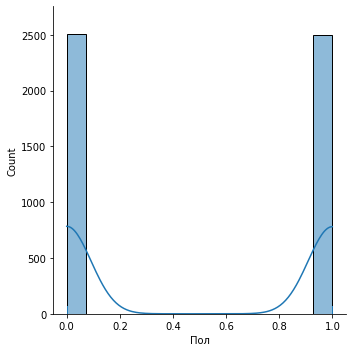

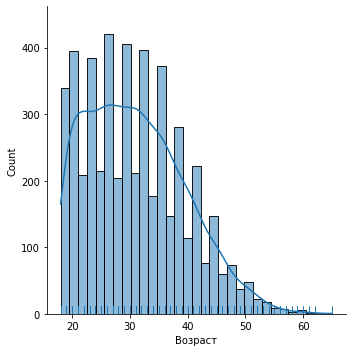

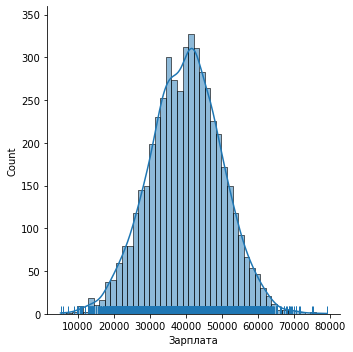

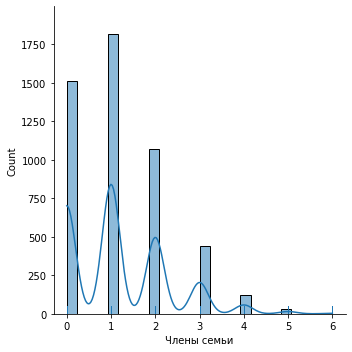

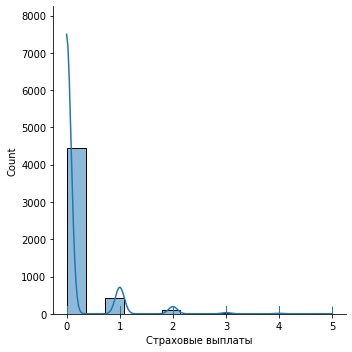

In [6]:
for column in ['Пол','Возраст', 'Зарплата', 'Члены семьи','Страховые выплаты']:
    sns.displot(df[column],kind='hist',rug=True,kde=True);   

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Почти и не рааставались сегодня:)<br>
ОК, Антон, убедительно)) СОбственно всё.<br>   
Ещё, правда, несколько идей в целом по теме: если рассматривать передачу данных третьим лицам, то к преимуществам данного подхода можно отнести, в первую очередь, ощутимую экономию ресурсов по сравнению с некоторыми известными алгоритмами шифрования, в особенности это касается ассиметричных алгоритмов с достаточно длинными ключами (AES, RSA), которые требуют много процессорного времени.<br><br>
    
К главному недостатку подхода можно отнести увеличение сложности проверки на вырожденность преобразования с ростом количества признаков в выборке. В рассмотренном случае необходимо подобрать подходящую матрицу размера  4×4 . Однако, если признаки будут исчисляться тысячами, что в теории всегда надо положить, то расчет соответствующих определителей может быть крайне ресурсозатратным. Но и эту проблему можно будет решить)<br><br>
    
Если есть время и желание, то можно воту этот маткриал просмотреть:<br>
Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf<br>
Шифрование исходного ключа по методу "Цезаря" (https://ru.wikipedia.org/wiki/%D0%A8%D0%B8%D1%84%D1%80_%D0%A6%D0%B5%D0%B7%D0%B0%D1%80%D1%8F)<br>
<font color='green'><font color='green'>
Спасибо за проект) <br>
Успешного дальнейшего обучения

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Обоснование:** 

Убедимся в том, что линейня регрессия из scikit-learn вычисляет значения по формуле.

In [7]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']

In [8]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w[1:])
model = LinearRegression()
model.fit(features, target)
model.coef_

[ 7.92580543e-03  3.57083050e-02 -1.70080492e-07 -1.35676623e-02]


array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])

Коэфициенты регрессии совпадают на 100%. Теперь перейдем к теоретической части.

Умнажаем матрицу признаков на матрицу шифрования и подставим результат в формулу обучения:

$$
w_{new} = ((XP^T (XP))^{-1} (XP)^T y
$$

Преобразуем выражение

$$
w_{new} = (P^T X^T XP)^{-1} P^T X^T y
$$

$$
w_{new} = (P^T (X^T X)P)^{-1} P^T X^T y
$$

$$
w_{new} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Видим схожесть: $(P^T)^{-1} P^T = E$, и формула станет иметь вид:

$$
w_{new} = P^{-1} X^{-1} (X^{T})^{-1} X^T y
$$

Использовав свойства матриц, получим:

$$
w_{new} = P^{-1}(X^{T}X)^{-1} X^T y
$$

$$
w_{new} = P^{-1}w
$$

Следовательно, так как веса линейной регрессии связаны, то качество модели, определяемое коэффициентом детерминации 
, не изменится. Модель будет давать одинаковые предсказания.

Подставим в формулу предсказаний $ a = X_{new}$ матрицу $ X_{new} = XP$ и признаки $w_{new}$

$$a_{new}  = XPw_{new} a_{new} = XPP^{-1}wa_{new} = Xw = a$$

**Ответ:** Не изменится.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>понял!</p>
</div>

## Алгоритм преобразования

1. Создадим случайную матрицу $P$ размерности $(nxn)$ для матрицы с данными $X$ размерности $(mxn)$.

2. Сразу проверяем полученную матрицу на обратимость. Если матрица обратима, идём дальше. Если матрица необратима, генерируем новые матрицы, до тех пор пока не получим обратимую матрицу или пока не достигнем лимита итераций.



3. Сохранаяем пару матриц $P, P^{-1}$
 как ключи для шифровки/ дешифровки.

4. Преобразовываем данные с помощью умножения матрицы $X$ на матрицу $P$.

5. Проверяем способность восстановить данные с помощью умножения на матрицу $P^{-1}$.

6. Сравниваем метрики для линейной регрессии на оригинальных и преобразованных данных.

7. Делаем вывод.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
да, тут как раз и нужен план действий для пункта 4) Делай раз, делай два, делай три...

## Проверка алгоритма


Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. 

In [9]:
features = df.drop(columns='Страховые выплаты', axis=1)
target = df['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features,    target,     random_state=12345,shuffle=True,   test_size=0.25)

In [10]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 для линейной регрессии',r2_score(target_test, predictions))

Значение метрики R2 для линейной регрессии 0.4352275712702667


In [11]:
# выведем саму матрицу
rand_matrix = np.random.randint(5, size=(4, 4))
rand_matrix

array([[0, 1, 1, 0],
       [3, 1, 1, 4],
       [3, 2, 0, 1],
       [0, 1, 0, 1]])

In [12]:
# проверка обратимости матрицы
np.linalg.inv(rand_matrix)

array([[-0.06666667,  0.06666667,  0.26666667, -0.53333333],
       [ 0.2       , -0.2       ,  0.2       ,  0.6       ],
       [ 0.8       ,  0.2       , -0.2       , -0.6       ],
       [-0.2       ,  0.2       , -0.2       ,  0.4       ]])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Верно, это обязательно.

In [13]:
# продемонстрируем перемноженную матрицу
multiple_feature = pd.DataFrame(features@np.random.randint(5, size=(4, 4)))
multiple_feature.columns = features.columns
display(multiple_feature)

,Пол,Возраст,Зарплата,Члены семьи
0,148846.0,198567.0,198567.0,99286.0
1,114050.0,152186.0,152185.0,76094.0
2,63029.0,84116.0,84116.0,42058.0
3,125129.0,166888.0,166886.0,83446.0
4,78329.0,104513.0,104514.0,52258.0
...,...,...,...,...
4995,107136.0,142916.0,142914.0,71460.0
4996,157238.0,209738.0,209737.0,104870.0
4997,101728.0,135684.0,135682.0,67844.0
4998,98135.0,130895.0,130893.0,65452.0


In [14]:
features_train = features_train.dot(rand_matrix)
features_test = features_test.dot(rand_matrix)
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 для линейной регрессии после преобразования',r2_score(target_test, predictions))

Значение метрики R2 для линейной регрессии после преобразования 0.43522757182313454


Вывод:
Как мы увидили на практике домножение признаков на обратимую квадратную матрицу не повлияло на качество модели. Данные успешно зашифрованы. В то же время это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Антон, и с линейной алгеброй ты справился)<br>
Всё, в общем-то, по делу, со смыслом. Доказательство в п.2 - понятно)<br>
Да и весь проект - на уровне.<br>
Не забыл про проверку на обратимость! ОК<br>
    
В общем-то, вопросов у меня и нет особых. Оставил только комментарий по графическому анализу - посомтри, пожалуйста.<br>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования